In [2]:
from RodeoMethods import *

print(provider.backends())

backendJakarta = provider.get_backend('ibmq_jakarta')
# backendCasablanca = provider.get_backend('ibmq_jakarta')
# casablanca was retired
backendQuito = provider.get_backend('ibmq_quito')
backendBelem = provider.get_backend('ibmq_belem')
backendPerth = provider.get_backend('ibm_perth')
backendQASM = provider.get_backend('ibmq_qasm_simulator')
# backend = provider.get_backend('simulator_statevector')
# simulator = Aer.get_backend('aer_simulator')
backend = backendPerth
print(backend)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-research', group='michstate-4', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-research', group='michstate-4', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-research', group='michstate-4', project='main')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-research', group='michstate-4', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-research', group='michstate-4', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-research', group='michstate-4', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-research', group='michstate-4', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q-research', group='michstate-4', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q-research', group='michstate-4', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q-research', grou

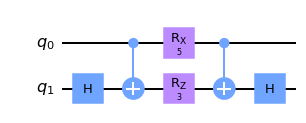

In [4]:
timeEvolve = QuantumCircuit(2)
timeEvolve.h(1)
timeEvolve.cx(0, 1)

timeEvolve.rx(2 * 2.5, 0)
timeEvolve.rz(2 * 1.5, 1)

timeEvolve.cx(0, 1)

timeEvolve.h(1)
timeEvolve.draw('mpl')

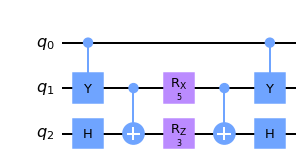

In [6]:
controlledReversal = QuantumCircuit(3)
controlledReversal.cy(0, 1)
controlledReversal.compose(timeEvolve, [1, 2], inplace=True)
controlledReversal.cy(0, 1)
controlledReversal.draw('mpl')
# firstLevel = controlledReversal.decompose()
# firstLevel.draw('mpl')

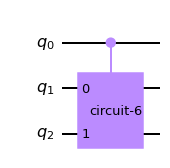

In [39]:
directControl = QuantumCircuit(3)
controlledTime = timeEvolve.to_gate().control(1)
directControl.append(controlledTime, [0, 1, 2])
directControl.draw('mpl')

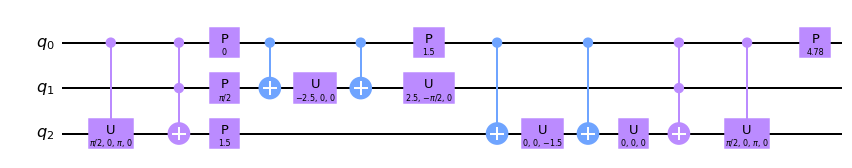

In [41]:
firstLevel = directControl.decompose()
secondLevel = firstLevel.decompose()
firstLevel.draw('mpl')

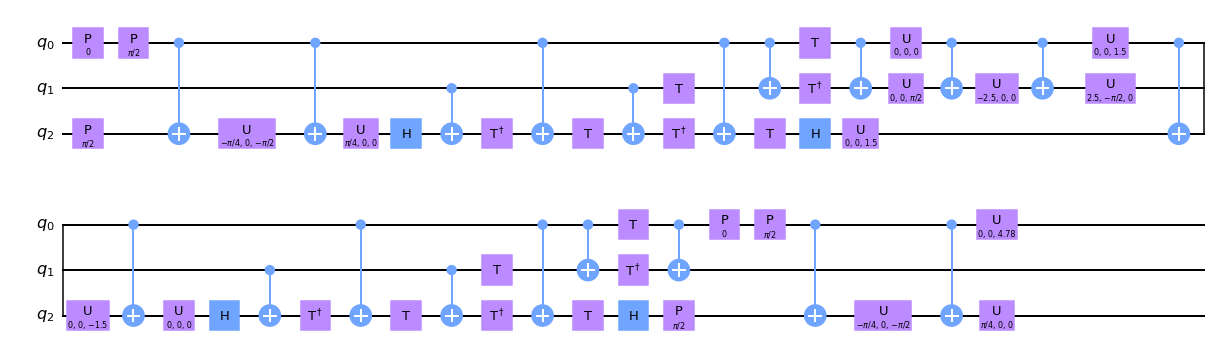

In [42]:
secondLevel.draw('mpl')

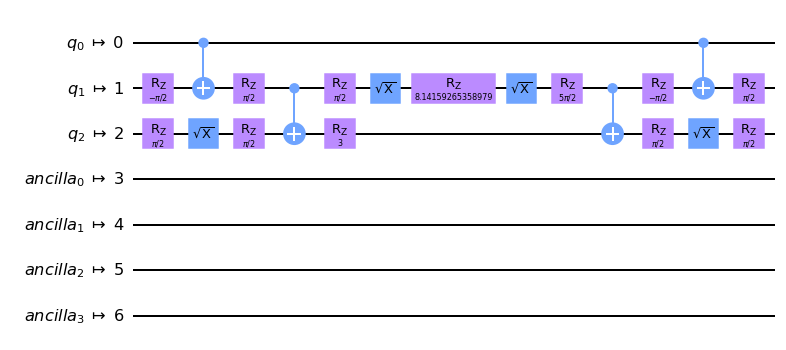

In [43]:
transpiledReversal = transpile(controlledReversal, backend=backend)
transpiledReversal.draw('mpl')

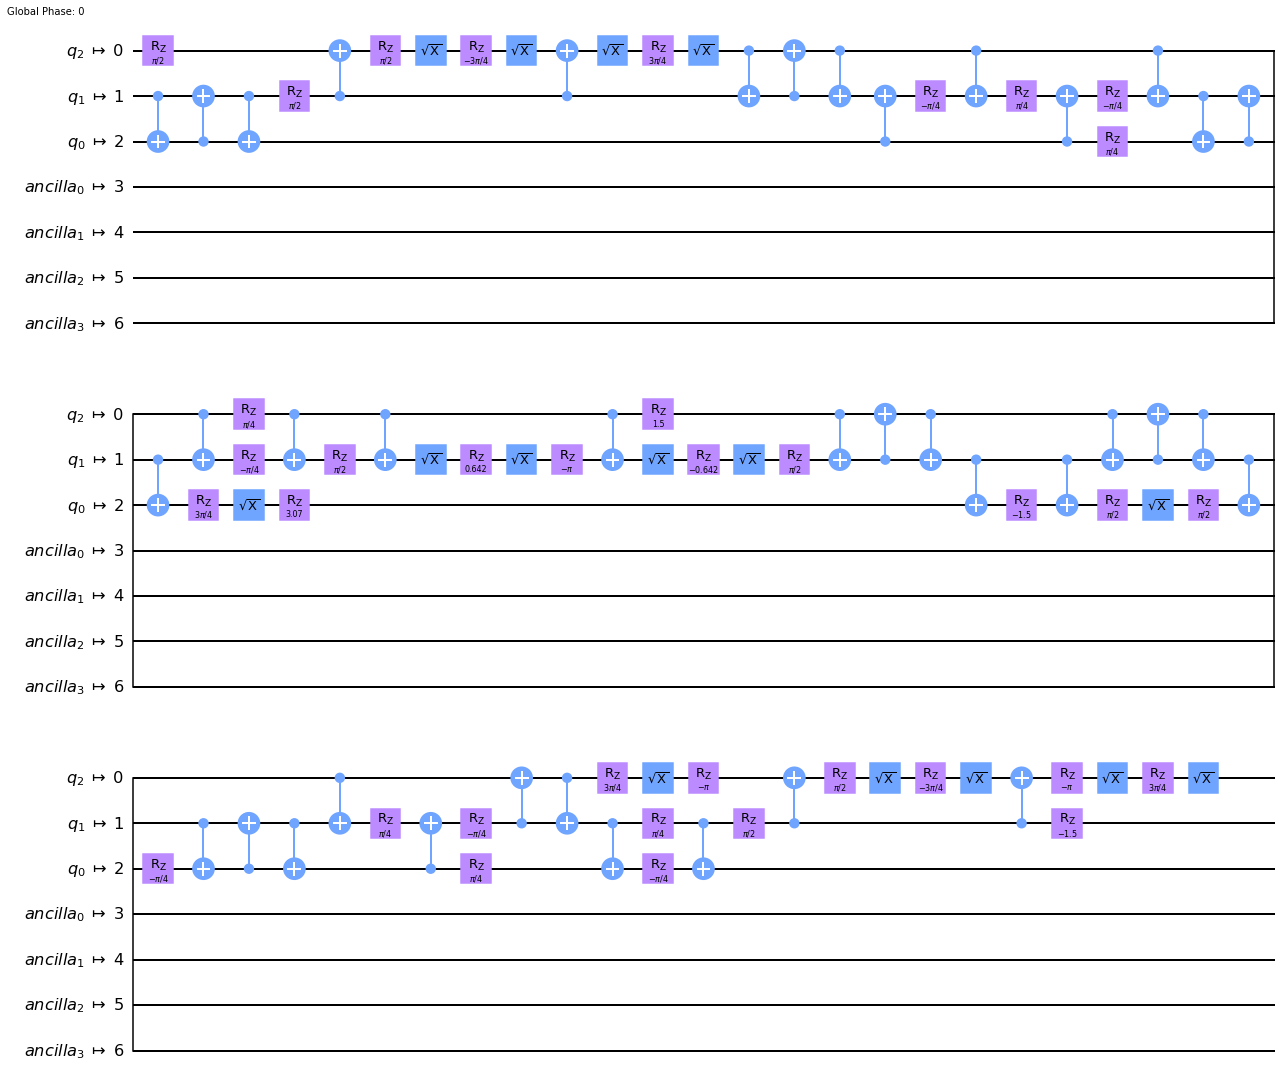

In [37]:
transpiledDirect = transpile(directControl, backend=backend)
transpiledDirect.draw('mpl')